In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dados = pd.read_csv(
    'winequality-red.csv', delimiter=";"
)

In [4]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dados['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

In [8]:
dados.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


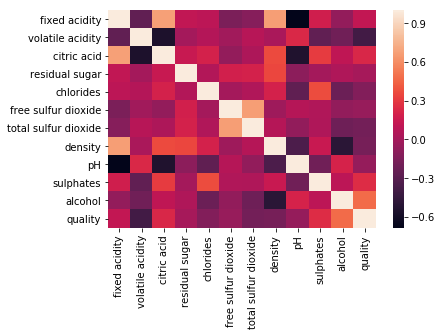

In [9]:
sns.heatmap(dados.corr())

In [30]:
#X = dados.drop(['quality'], axis=1)
X = dados[
    ['fixed acidity', 'citric acid', 'alcohol',
    'sulphates', 'residual sugar']
]
Y = dados['quality']
X.head()

,fixed acidity,citric acid,alcohol,sulphates,residual sugar
0,7.4,0.00,9.4,0.56,1.9
1,7.8,0.00,9.8,0.68,2.6
2,7.8,0.04,9.8,0.65,2.3
3,11.2,0.56,9.8,0.58,1.9
4,7.4,0.00,9.4,0.56,1.9


In [31]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [32]:
x_treino, x_teste, y_treino, y_teste = \
    train_test_split(X, Y, test_size=0.3)

In [33]:
x_treino.head()

,fixed acidity,citric acid,alcohol,sulphates,residual sugar
106,7.8,0.68,9.3,1.31,1.7
1335,6.6,0.02,12.6,0.66,2.4
1277,7.0,0.00,9.7,0.60,1.9
1293,7.5,0.00,9.7,0.49,1.9
1119,5.6,0.00,12.9,0.58,2.5


In [34]:
y_treino.head()

106     5
1335    6
1277    6
1293    4
1119    5
Name: quality, dtype: int64

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
arvore_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()

In [37]:
arvore_model.fit(x_treino, y_treino)
knn_model.fit(x_treino, y_treino)
print()

In [38]:
arvore_model.predict(x_teste)

array([5, 6, 6, 6, 8, 5, 5, 5, 7, 7, 6, 6, 7, 6, 5, 6, 5, 6, 5, 5, 6, 7,
       6, 5, 6, 4, 5, 6, 7, 6, 6, 6, 5, 5, 5, 7, 5, 6, 7, 6, 5, 7, 4, 5,
       6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6,
       5, 5, 4, 5, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 6, 6,
       6, 6, 4, 5, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 7,
       5, 6, 5, 7, 6, 5, 5, 6, 7, 6, 7, 4, 5, 5, 6, 7, 6, 5, 6, 5, 7, 6,
       6, 5, 6, 5, 7, 5, 6, 6, 6, 7, 7, 5, 6, 6, 3, 6, 6, 6, 5, 5, 6, 7,
       5, 5, 6, 6, 5, 8, 6, 5, 5, 5, 5, 6, 5, 7, 5, 4, 5, 6, 7, 7, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 6, 7, 7, 5, 7, 6, 5, 7, 7, 6, 5, 4, 5, 6, 5, 6, 5, 6, 4, 6, 6,
       6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 7, 5, 5, 6, 6, 5, 6, 6, 3, 5, 6, 7, 6, 6, 6, 5, 4, 5,
       5, 7, 6, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 7, 6, 5,
       5, 6, 6, 5, 6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 6,

In [39]:
arvore_model.score(x_teste, y_teste)

0.5708333333333333

In [40]:
knn_model.score(x_teste, y_teste)

0.5208333333333334

In [41]:
resultados = []
for i in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_treino, y_treino)
    resultados.append(
        knn_model.score(x_teste, y_teste)
    )

In [42]:
resultados

[0.5791666666666667,
 0.5291666666666667,
 0.4979166666666667,
 0.51875,
 0.5208333333333334,
 0.5166666666666667,
 0.5416666666666666,
 0.5458333333333333,
 0.5541666666666667,
 0.5375,
 0.5291666666666667,
 0.53125,
 0.5291666666666667,
 0.5291666666666667,
 0.525,
 0.5416666666666666,
 0.5458333333333333,
 0.5416666666666666,
 0.5395833333333333,
 0.55,
 0.53125,
 0.5479166666666667,
 0.5416666666666666,
 0.5333333333333333,
 0.5291666666666667,
 0.5395833333333333,
 0.5375,
 0.5333333333333333,
 0.5354166666666667]

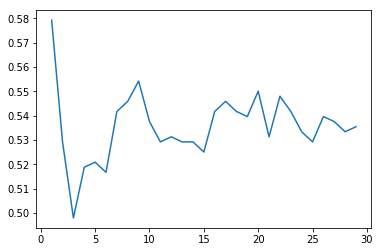

In [43]:
plt.plot(list(range(1, 30)), resultados)